In [1]:
pip install pandas


Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install pillow

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import os

                                          image_path label  phase
0  C:/Users/shiva/OneDrive/Documents/archive (7)[...   ALL  train
1  C:/Users/shiva/OneDrive/Documents/archive (7)[...   ALL  train
2  C:/Users/shiva/OneDrive/Documents/archive (7)[...   ALL  train
3  C:/Users/shiva/OneDrive/Documents/archive (7)[...   ALL  train
4  C:/Users/shiva/OneDrive/Documents/archive (7)[...   ALL  train


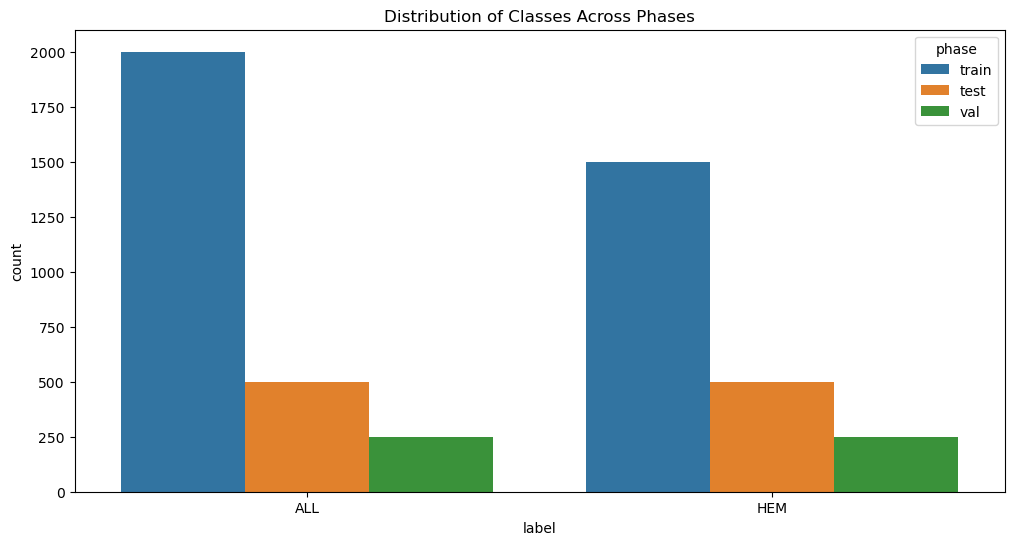

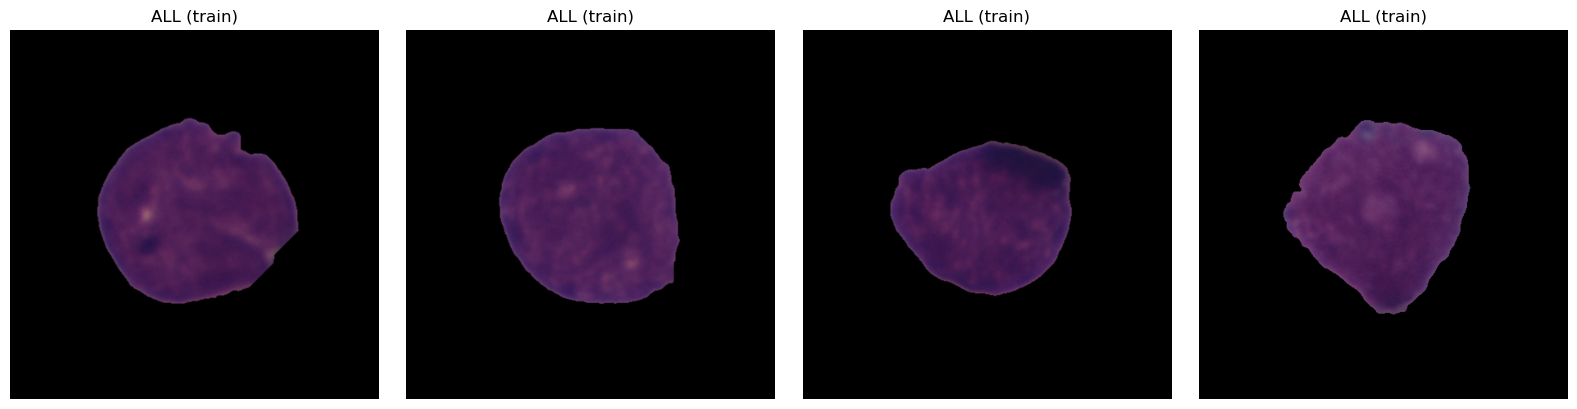

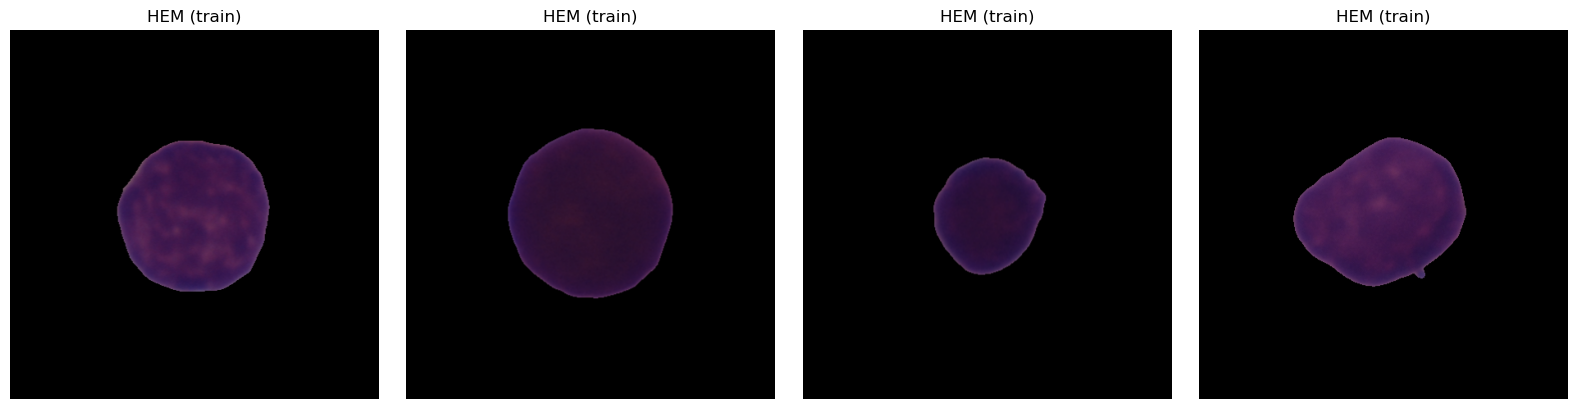

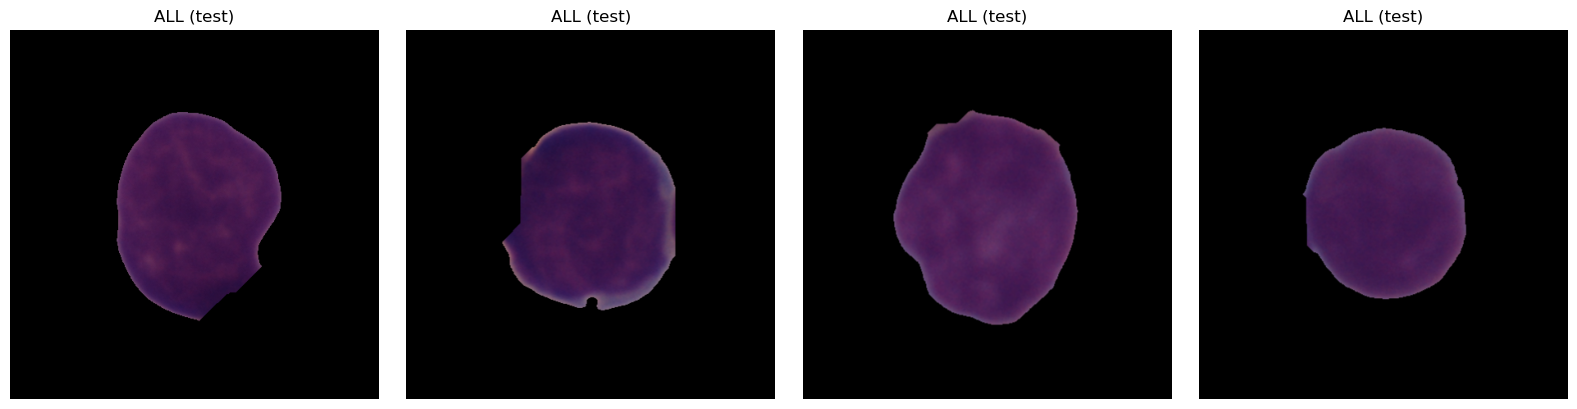

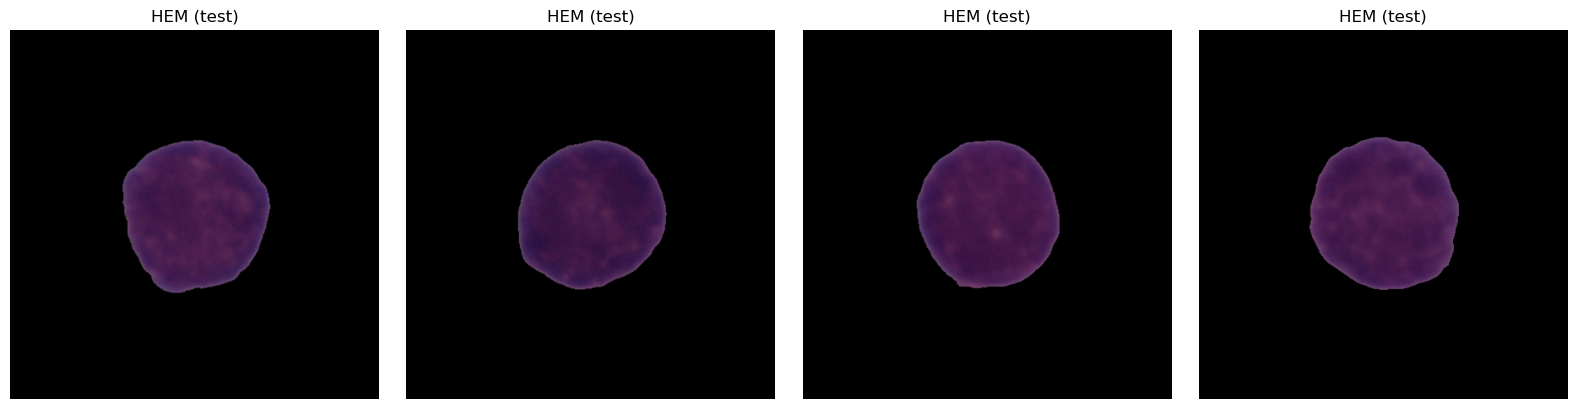

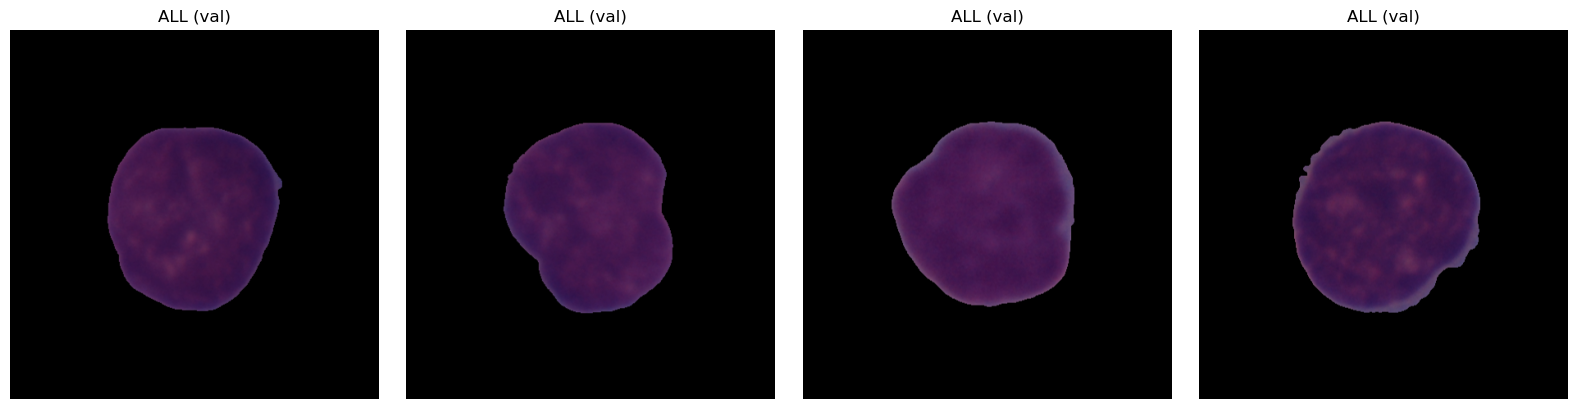

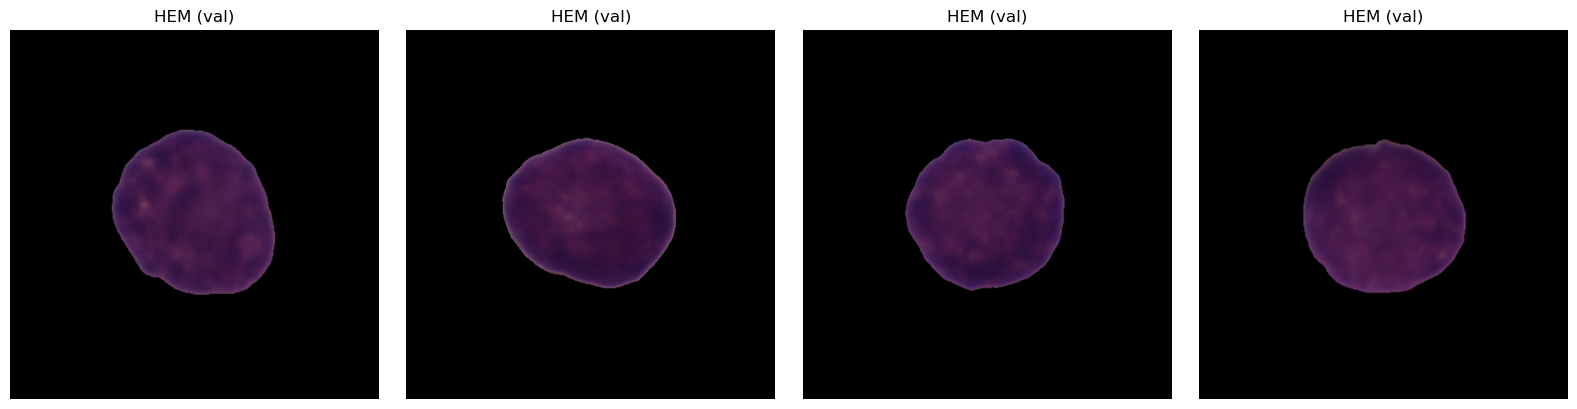

Class distribution in Training Set:
 label
ALL    2000
HEM    1500
Name: count, dtype: int64
Class distribution in Testing Set:
 label
ALL    500
HEM    500
Name: count, dtype: int64
Class distribution in Validation Set:
 label
ALL    250
HEM    250
Name: count, dtype: int64


In [68]:


data_paths = {
    'train': 'C:/Users/shiva/OneDrive/Documents/archive (7)[1]/Leukemia5K/Training',
    'test': 'C:/Users/shiva/OneDrive/Documents/archive (7)[1]/Leukemia5K/Testing',
    'val': 'C:/Users/shiva/OneDrive/Documents/archive (7)[1]/Leukemia5K/Validation'
}

data = []

for phase, path in data_paths.items():
    for label in ['ALL', 'HEM']:
        class_path = os.path.join(path, label)
        for img_name in os.listdir(class_path):
            img_path = os.path.join(class_path, img_name)
            data.append((img_path, label, phase))


df = pd.DataFrame(data, columns=['image_path', 'label', 'phase'])


print(df.head())


plt.figure(figsize=(12, 6))
sns.countplot(x='label', hue='phase', data=df)
plt.title('Distribution of Classes Across Phases')
plt.show()


def display_sample_images(df, phase='train', label='ALL', rows=1, cols=4):
    phase_label_df = df[(df['phase'] == phase) & (df['label'] == label)]
    fig, axes = plt.subplots(rows, cols, figsize=(16, 4))
    for i, ax in enumerate(axes.flat[:rows * cols]):
        img_path = phase_label_df.iloc[i]['image_path']
        img = Image.open(img_path)
        ax.imshow(img)
        ax.set_title(f"{label} ({phase})")
        ax.axis('off')
    plt.tight_layout()
    plt.show()


display_sample_images(df, phase='train', label='ALL')
display_sample_images(df, phase='train', label='HEM')
display_sample_images(df, phase='test', label='ALL')
display_sample_images(df, phase='test', label='HEM')
display_sample_images(df, phase='val', label='ALL')
display_sample_images(df, phase='val', label='HEM')



train_counts = df[df['phase'] == 'train']['label'].value_counts()
test_counts = df[df['phase'] == 'test']['label'].value_counts()
val_counts = df[df['phase'] == 'val']['label'].value_counts()

print("Class distribution in Training Set:\n", train_counts)
print("Class distribution in Testing Set:\n", test_counts)
print("Class distribution in Validation Set:\n", val_counts)

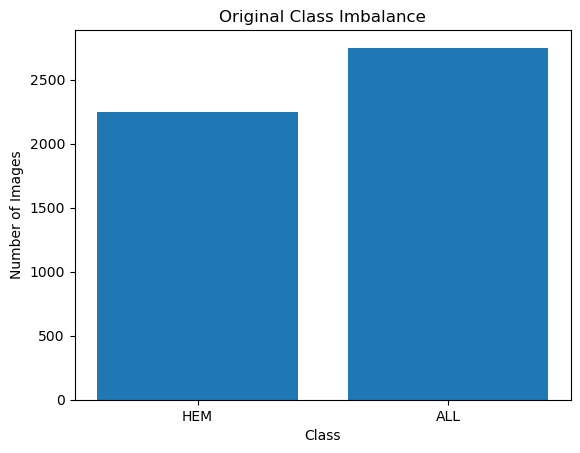

In [32]:

all_count = df[df['label'] == 'ALL'].shape[0]
hem_count = df[df['label'] == 'HEM'].shape[0]


plt.bar(['HEM', 'ALL'], [hem_count, all_count])
plt.title('Original Class Imbalance')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.show()


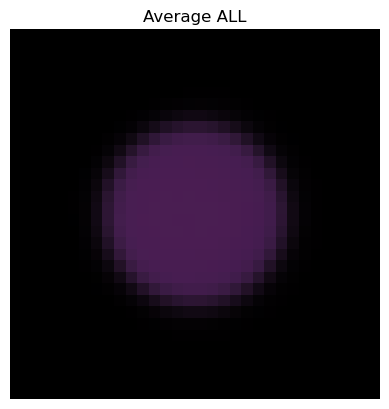

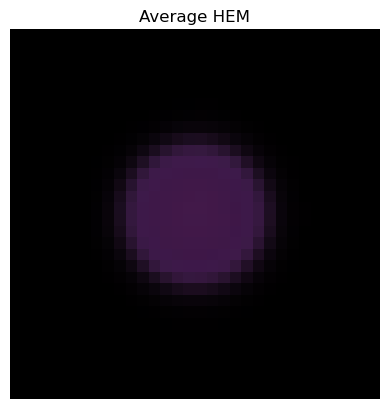

In [35]:

def find_mean_img(image_paths, title, size=(32, 32)):
    images = []
    for img_path in image_paths:
        img = Image.open(img_path)
        img = img.resize(size) 
        img = np.array(img)
        images.append(img)
    
    mean_img = np.mean(images, axis=0)
    plt.imshow(mean_img.astype(np.uint8), vmin=0, vmax=255)
    plt.title(f'Average {title}')
    plt.axis('off')
    plt.show()
    return mean_img


all_image_paths = df[df['label'] == 'ALL']['image_path'].values
hem_image_paths = df[df['label'] == 'HEM']['image_path'].values


all_mean = find_mean_img(all_image_paths, 'ALL')
hem_mean = find_mean_img(hem_image_paths, 'HEM')


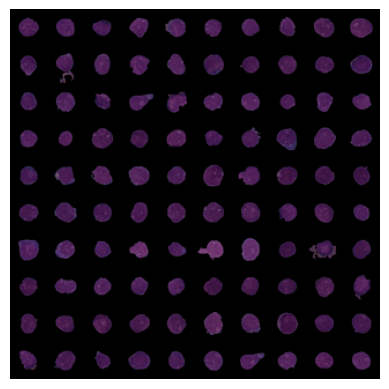

In [45]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

def create_image_montage(image_paths, montage_size=(10, 10), image_size=(32, 32)):
    montage = Image.new('RGB', (montage_size[1] * image_size[1], montage_size[0] * image_size[0]))
    for i, img_path in enumerate(image_paths):
        img = Image.open(img_path)
        img = img.resize(image_size)
        row = i // montage_size[1]
        col = i % montage_size[1]
        montage.paste(img, (col * image_size[1], row * image_size[0]))
        if i >= montage_size[0] * montage_size[1] - 1:
            break
    plt.imshow(np.array(montage))
    plt.axis('off')
    plt.show()


all_train_image_paths = df[(df['phase'] == 'train') & (df['label'] == 'ALL')]['image_path'].values
create_image_montage(all_train_image_paths[:100])
